# DSC180A Final Project

Jian Jiao, Zihan Qin

## Setup

In [174]:
import sys
sys.path.append("..")
import src.features.feature
import src.models.model
import src.analysis.eda

In [136]:
import re
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## ETL & feature extraction

In [6]:
# Malware
path_mal = '/teams/DSC180A_FA20_A00/a04malware/malware' # Path
features_mal = parse_mal(path_mal)

Kyview
Fjcon
Koler
Ksapp
FakeAV
Boxer
RuMMS
Kemoge


In [5]:
# Safeware
path_saf = '/teams/DSC180A_FA20_A00/a04malware/popular-apps' # Path
features_saf = parse_common(path_saf)

net.updategames.granny
com.gameloft.android.ANMP.GloftA8HM
com.devsisters.gb
com.huobi.cn
com.gretech.gomplayerko
com.buffstudio.sevendays_free
com.sega.comixzone
com.facebook.katana


In [7]:
features = list(pd.DataFrame(features_mal)[0]) + list(pd.DataFrame(features_saf)[0])

In [ ]:
df = features_todf(features)

In [142]:
df['smalis'] = df.num_smali.apply(lambda x:x // 1000 * 1000)
df['uniques'] = df.num_unique_api.apply(lambda x:x // 1000 * 1000)
df['blocks'] = df.num_block.apply(lambda x:x // 10000 * 10000)

## EDA

In [143]:
df # max smali files set to be 50000 to avoid excessive memory usage

,app_type,is_malware,num_smali,num_api,num_unique_api,num_block,num_direct,num_static,num_virtual,num_interface,num_super,smalis,uniques,blocks
0,Kyview,1,50000,1366536,19267,329129,256706,250206,758717,87700,13207,50000,19000,320000
1,Fjcon,1,5291,169268,1081,34688,27745,24126,102768,12852,1777,5000,1000,30000
2,Koler,1,9231,179092,2736,69345,34591,26110,99455,15609,3327,9000,2000,60000
3,Koler,1,9231,179092,2736,69345,34591,26110,99455,15609,3327,9000,2000,60000
4,Ksapp,1,22132,786834,11460,154143,157235,141413,433224,48804,6158,22000,11000,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,com.ubisoft.mightyquest,0,9921,175437,9511,55371,35540,42229,78396,17822,1450,9000,9000,50000
124,com.wb.goog.dc.legends,0,8098,160454,7953,46313,31494,36814,75498,14773,1875,8000,7000,40000
125,com.empire.grow.rome,0,9742,169963,9357,54283,33845,42649,73962,18077,1430,9000,9000,50000
126,com.blwp.newyear,0,9040,167854,8606,53390,32996,35385,81413,15801,2259,9000,8000,50000


In [144]:
df.describe()

,is_malware,num_smali,num_api,num_unique_api,num_block,num_direct,num_static,num_virtual,num_interface,num_super,smalis,uniques,blocks
count,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.000000,128.000000,128.000000,128.00000,128.000000
mean,0.500000,23298.734375,6.324814e+05,8050.710938,149216.695312,117533.046875,116669.585938,3.466808e+05,45835.179688,5762.796875,22960.937500,7523.43750,145234.375000
std,0.501965,19612.249379,6.296871e+05,5067.649472,129834.780822,113024.404848,115886.154519,3.569301e+05,41326.706647,5455.072370,19784.031716,5132.82603,130896.153127
min,0.000000,61.000000,1.092000e+03,132.000000,262.000000,220.000000,263.000000,5.370000e+02,60.000000,12.000000,0.000000,0.00000,0.000000
25%,0.000000,7561.000000,1.575848e+05,3458.000000,47565.500000,29766.750000,28526.750000,7.688725e+04,14749.250000,1459.250000,7000.000000,3000.00000,40000.000000
50%,0.500000,9691.000000,1.865685e+05,8013.500000,55649.000000,35529.000000,42072.000000,9.565250e+04,18526.000000,2227.000000,9000.000000,8000.00000,50000.000000
75%,1.000000,50000.000000,1.115727e+06,10724.250000,293061.000000,219764.000000,173337.000000,6.363060e+05,63789.000000,9645.250000,50000.000000,10250.00000,290000.000000
max,1.000000,50000.000000,1.843603e+06,22279.000000,410455.000000,322330.000000,351067.000000,1.042313e+06,129531.000000,15776.000000,50000.000000,22000.00000,410000.000000


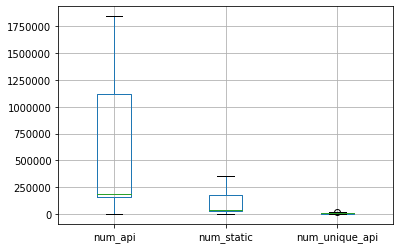

In [126]:
# Generate boxplots
df.boxplot(column=['num_api', 'num_static', 'num_unique_api'])

In [145]:
df.corr()

,is_malware,num_smali,num_api,num_unique_api,num_block,num_direct,num_static,num_virtual,num_interface,num_super,smalis,uniques,blocks
is_malware,1.000000,0.818237,0.772880,0.133902,0.807067,0.792758,0.739921,0.771437,0.765917,0.792485,0.817857,0.129884,0.803517
num_smali,0.818237,1.000000,0.924941,0.294771,0.974701,0.938603,0.897876,0.922700,0.913119,0.955325,0.999917,0.286606,0.973944
num_api,0.772880,0.924941,1.000000,0.484070,0.863097,0.993966,0.994374,0.999165,0.972960,0.965920,0.924520,0.476164,0.862911
num_unique_api,0.133902,0.294771,0.484070,1.000000,0.284657,0.450516,0.523755,0.468419,0.579459,0.377137,0.291818,0.998975,0.287035
num_block,0.807067,0.974701,0.863097,0.284657,1.000000,0.873717,0.838182,0.857700,0.880487,0.929304,0.974586,0.278594,0.999864
num_direct,0.792758,0.938603,0.993966,0.450516,0.873717,1.000000,0.981094,0.991339,0.970058,0.960531,0.937906,0.442626,0.872789
num_static,0.739921,0.897876,0.994374,0.523755,0.838182,0.981094,1.000000,0.992492,0.966028,0.952807,0.897637,0.516088,0.838240
num_virtual,0.771437,0.922700,0.999165,0.468419,0.857700,0.991339,0.992492,1.000000,0.965461,0.966118,0.922412,0.460369,0.857606
num_interface,0.765917,0.913119,0.972960,0.579459,0.880487,0.970058,0.966028,0.965461,1.000000,0.942619,0.911787,0.572669,0.880809
num_super,0.792485,0.955325,0.965920,0.377137,0.929304,0.960531,0.952807,0.966118,0.942619,1.000000,0.955174,0.369023,0.929499


Malware, Mean = 39283.390625


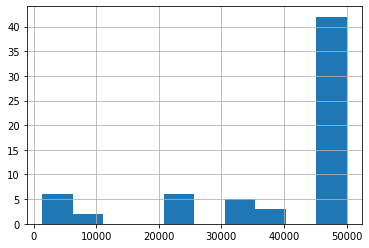

In [115]:
df.loc[df.is_malware == 1].num_smali.hist()
print('Malware, Mean = {}'.format(df.loc[df.is_malware == 1].num_smali.mean()))

Normal software, Mean = 7314.078125


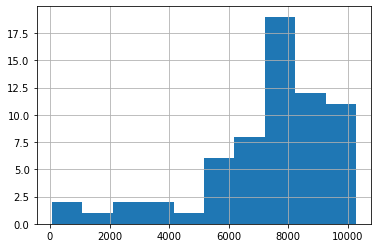

In [117]:
df.loc[df.is_malware == 0].num_smali.hist()
print('Normal software, Mean = {}'.format(df.loc[df.is_malware == 0].num_smali.mean()))

In [124]:
# Variety 
df.groupby('app_type')['is_malware'].count().sort_values(ascending=False)

app_type
Lotoor                          15
BankBot                          8
GingerMaster                     7
FakeInst                         5
SimpleLocker                     4
                                ..
com.lulu.lulubox                 1
com.microsoft.todos              1
com.miniclip.plagueinc           1
com.mochibits.hexario.google     1
Andup                            1
Name: is_malware, Length: 86, dtype: int64

In [187]:
df.is_malware.value_counts()

1    64
0    64
Name: is_malware, dtype: int64

In [150]:
def colors(n):
    col = []
    for _ in range(n):
        col.append(np.random.rand(3,))
    return col

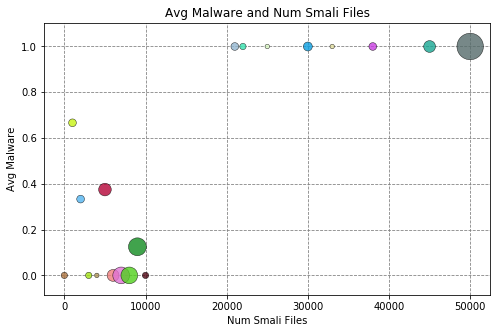

In [153]:
fig, ax = plt.subplots(figsize=[8,5])
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.scatter(df.groupby('smalis')['is_malware'].mean().index, df.groupby('smalis')['is_malware'].mean(), s=df.groupby('smalis')['is_malware'].count() * 20, c=colors(19), linewidths=0.5,edgecolors='black',alpha=0.8)
plt.xlabel('Num Smali Files')
plt.ylabel('Avg Malware')
plt.title('Avg Malware and Num Smali Files');

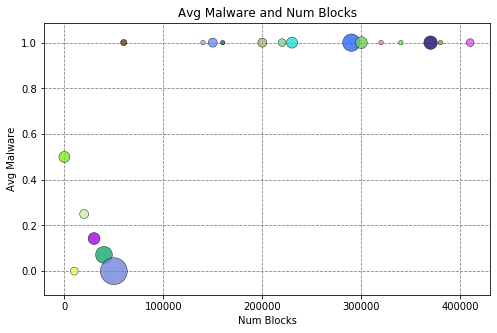

In [157]:
fig, ax = plt.subplots(figsize=[8,5])
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.scatter(df.groupby('blocks')['is_malware'].mean().index, df.groupby('blocks')['is_malware'].mean(), s=df.groupby('blocks')['is_malware'].count() * 20, c=colors(20), linewidths=0.5,edgecolors='black',alpha=0.8)
plt.xlabel('Num Blocks')
plt.ylabel('Avg Malware')
plt.title('Avg Malware and Num Blocks');

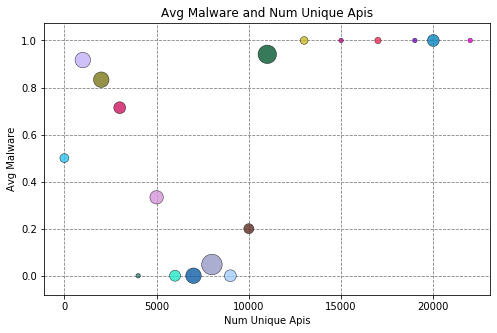

In [161]:
fig, ax = plt.subplots(figsize=[8,5])
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.scatter(df.groupby('uniques')['is_malware'].mean().index, df.groupby('uniques')['is_malware'].mean(), s=df.groupby('uniques')['is_malware'].count() * 20, c=colors(18), linewidths=0.5,edgecolors='black',alpha=0.8)
plt.xlabel('Num Unique Apis')
plt.ylabel('Avg Malware')
plt.title('Avg Malware and Num Unique Apis');

In [12]:
# modified A matrix (type-api)
matrix_A(features, df.app_types)

,api,Kyview,Fjcon,Koler,Ksapp,FakeAV,Boxer,RuMMS,Kemoge,granny,GloftA8HM,devsisters,huobi,gomplayerko,sevendays_free,com.sega.comixzone,katana
0,Ljava/lang/StringBuilder,107542.0,12471.0,16412.0,99665.0,15719.0,18878.0,40513.0,84003.0,2800.0,18518.0,15047.0,22135.0,18452.0,12800.0,12919.0,2538.0
1,Ljava/lang/String,36444.0,5879.0,7191.0,50499.0,2345.0,1276.0,8341.0,23033.0,1171.0,5737.0,4472.0,7089.0,5956.0,6140.0,4138.0,2635.0
2,Ljava/lang/Object,20353.0,3503.0,5650.0,18342.0,3888.0,1840.0,18677.0,19466.0,1056.0,5560.0,5331.0,5063.0,5308.0,6678.0,5540.0,3316.0
3,Ljava/lang/StringBuffer,15847.0,1139.0,41.0,13694.0,70.0,1188.0,20.0,5694.0,23.0,89.0,12.0,375.0,261.0,68.0,91.0,35.0
4,Landroid/os/Parcel,13560.0,1090.0,3159.0,646.0,8843.0,0.0,14920.0,54136.0,552.0,3164.0,2789.0,3064.0,3374.0,3113.0,3252.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76187,LX/0X5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76188,LX/0jm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76189,LX/0Uo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76190,LX/07T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model

In [166]:
X,y = generate_Xy(df)

In [ ]:
X_train, X_test, y_train, y_test = ttsplit(X.values.tolist(),list(y))

In [169]:
# Logistic
reg = build_Log(X_train, y_train, 1, 1000)

In [170]:
pred_train_base = baseline_predict(X_train)
pred_test_base = baseline_predict(X_test)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [179]:
# Baseline
mse_base = accuracy(y_train, y_test, pred_train_base, pred_test_base)

train Accuracy = 0.5116279069767442, test Accuracy = 0.47619047619047616


In [184]:
# Logistic
mse_logistic = accuracy(y_train, y_test, pred_train, pred_test)

train Accuracy = 1.0, test Accuracy = 0.9761904761904762


In [180]:
# K-Neighbors
neigh = build_KN(X_train, y_train)
mse_knn = accuracy(y_train, y_test, neigh.predict(X_train), neigh.predict(X_test))

train Accuracy = 0.9651162790697675, test Accuracy = 0.8809523809523809


In [182]:
# Try for different n_neighbors
for n in range(1,10):
    neigh = build_KN(X_train, y_train)
    mse_knn = accuracy(y_train, y_test, neigh.predict(X_train), neigh.predict(X_test))

train Accuracy = 1.0, test Accuracy = 0.9047619047619048
train Accuracy = 0.9767441860465116, test Accuracy = 0.9047619047619048
train Accuracy = 0.9767441860465116, test Accuracy = 0.9047619047619048
train Accuracy = 0.9534883720930233, test Accuracy = 0.8809523809523809
train Accuracy = 0.9651162790697675, test Accuracy = 0.8809523809523809
train Accuracy = 0.9651162790697675, test Accuracy = 0.8809523809523809
train Accuracy = 0.9651162790697675, test Accuracy = 0.8809523809523809
train Accuracy = 0.9534883720930233, test Accuracy = 0.8809523809523809
train Accuracy = 0.9534883720930233, test Accuracy = 0.8809523809523809


In [185]:
# Try for different C
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    reg = build_Log(X_train, y_train, c, 1000)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    accuracy(y_train, y_test, pred_train, pred_test)

train Accuracy = 1.0, test Accuracy = 0.9761904761904762
train Accuracy = 1.0, test Accuracy = 0.9761904761904762
train Accuracy = 1.0, test Accuracy = 0.9761904761904762
train Accuracy = 1.0, test Accuracy = 0.9761904761904762
train Accuracy = 1.0, test Accuracy = 0.9761904761904762
train Accuracy = 1.0, test Accuracy = 0.9761904761904762
